In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff

In [2]:
# Load the No Insurance File
no_ins_data_to_load = "Resources/no_insurance.csv"
fips_to_load = "Resources/mn_fips.csv"

# Read the MN No Insurance File
ins_df = pd.read_csv(no_ins_data_to_load)
fips_df = pd.read_csv(fips_to_load)

ins_df.head()

,indicator,year,county,age,sex,povertyThreshold,count,population,percent,ci
0,insurance,2011,Aitkin,Children (<19 years),Both combined,NaN,283,NaN,9.5,(7.7 - 11.3)
1,insurance,2012,Aitkin,Children (<19 years),Both combined,NaN,261,NaN,9.1,(7.2 - 11.0)
2,insurance,2013,Aitkin,Children (<19 years),Both combined,NaN,254,NaN,9.0,(7.3 - 10.7)
3,insurance,2014,Aitkin,Children (<19 years),Both combined,NaN,182,NaN,6.4,(5.0 - 7.8)
4,insurance,2011,Anoka,Children (<19 years),Both combined,NaN,5485,NaN,6.2,(5.2 - 7.2)


In [20]:
#insurance_table = pd.merge(ins_df, fips_df, on="county", how="outer")
#insurance_table.head()

In [35]:
insurance_df = ins_df.drop(columns=['indicator', 'population', 'sex', 'povertyThreshold', 'ci'])
insurance_df.head(10)

,year,county,age,count,percent
0,2011,Aitkin,Children (<19 years),283,9.5
1,2012,Aitkin,Children (<19 years),261,9.1
2,2013,Aitkin,Children (<19 years),254,9.0
3,2014,Aitkin,Children (<19 years),182,6.4
4,2011,Anoka,Children (<19 years),5485,6.2
5,2012,Anoka,Children (<19 years),4220,4.8
6,2013,Anoka,Children (<19 years),4791,5.5
7,2014,Anoka,Children (<19 years),2993,3.5
8,2011,Becker,Children (<19 years),821,9.9
9,2012,Becker,Children (<19 years),749,9.0


In [52]:
ins_bycounty = insurance_df.groupby(['county'])
county_name = ins_bycounty["county"].unique()
avg_count = round(ins_bycounty["count"].mean(),2)
avg_percent = round(ins_bycounty["percent"].mean(),2)

([<matplotlib.axis.XTick at 0x1ab162948d0>,
 <a list of 88 Text xticklabel objects>)

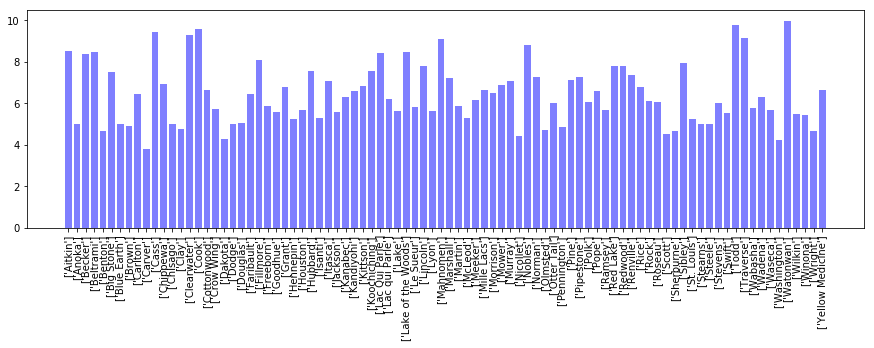

In [48]:
x_axis = np.arange(len(ins_bycounty))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(15,4))
plt.bar(x_axis, avg_percent, color="b", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, county_name, rotation="vertical")